<a href="https://colab.research.google.com/github/danhpham2000/Classification/blob/main/Loan_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/lending_club_loan_two.csv")

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,...,Retirement Counselor,St Francis Medical Center,Data Center Specialist II,Operations Manager,Michael's Arts & Crafts,licensed bankere,Agent,City Carrier,"Gracon Services, Inc",Internal Revenue Service
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

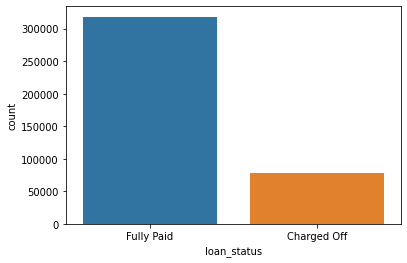

In [7]:
sns.countplot(df["loan_status"])

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

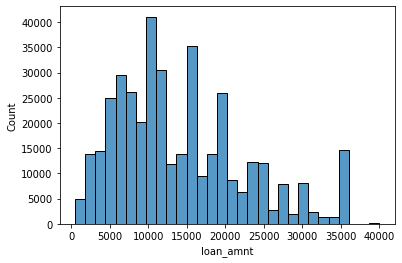

In [8]:
sns.histplot(x="loan_amnt", data=df, bins=30)

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

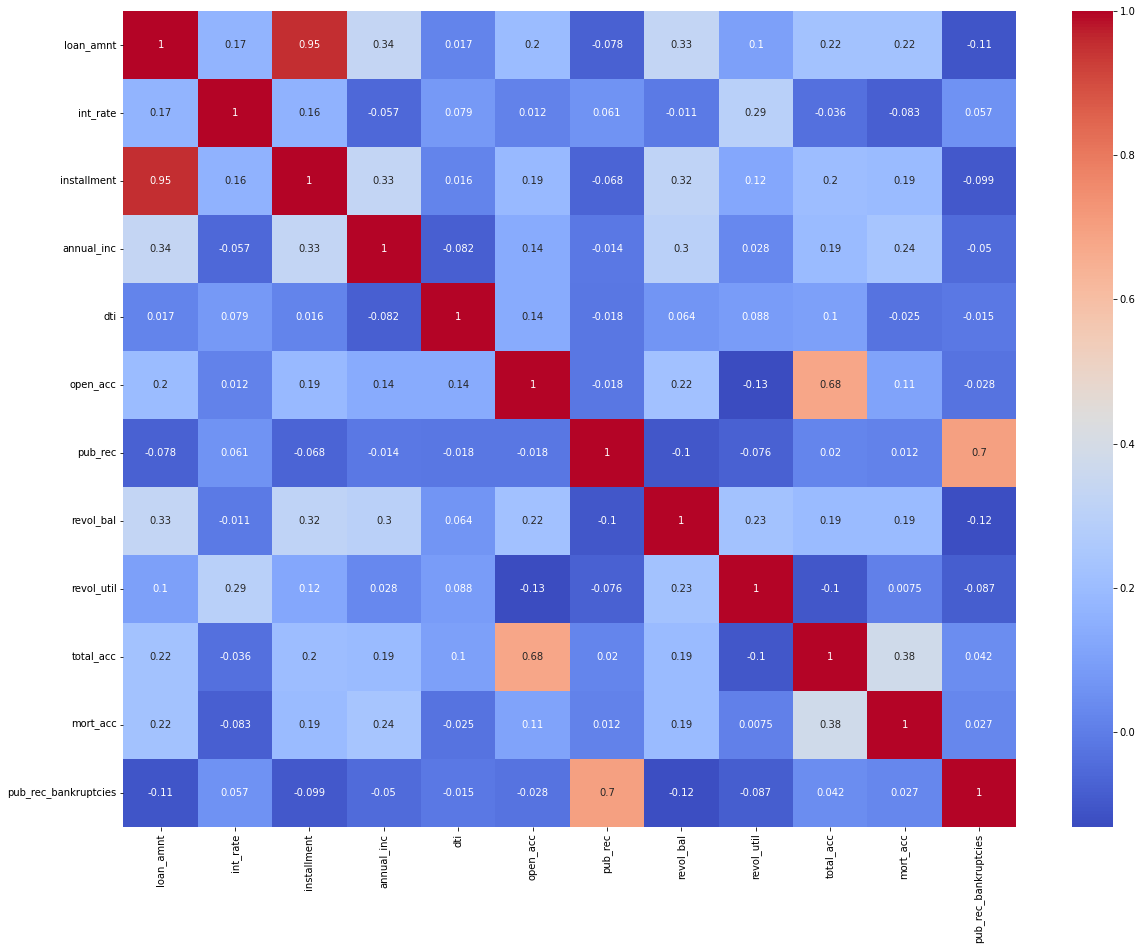

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

<AxesSubplot:xlabel='installment', ylabel='loan_amnt'>

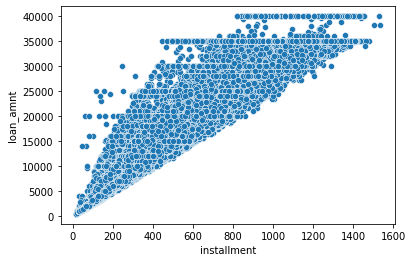

In [11]:
sns.scatterplot(x="installment", y="loan_amnt", data=df)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

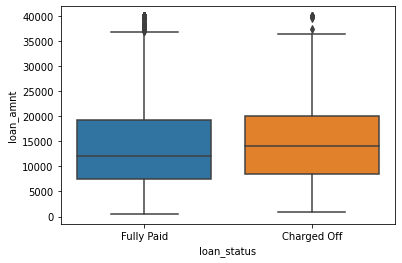

In [12]:
sns.boxplot(x="loan_status", y="loan_amnt", data=df)

In [13]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [14]:
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
print(df["grade"].unique())

['B' 'A' 'C' 'E' 'D' 'F' 'G']


In [16]:
print(df["sub_grade"].unique())

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


<AxesSubplot:xlabel='grade', ylabel='count'>

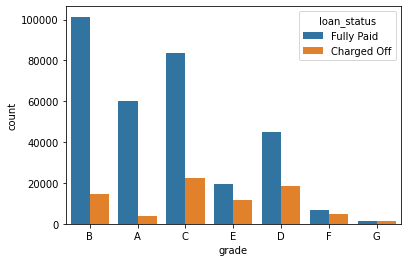

In [17]:
sns.countplot(x="grade", data=df, hue="loan_status")

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

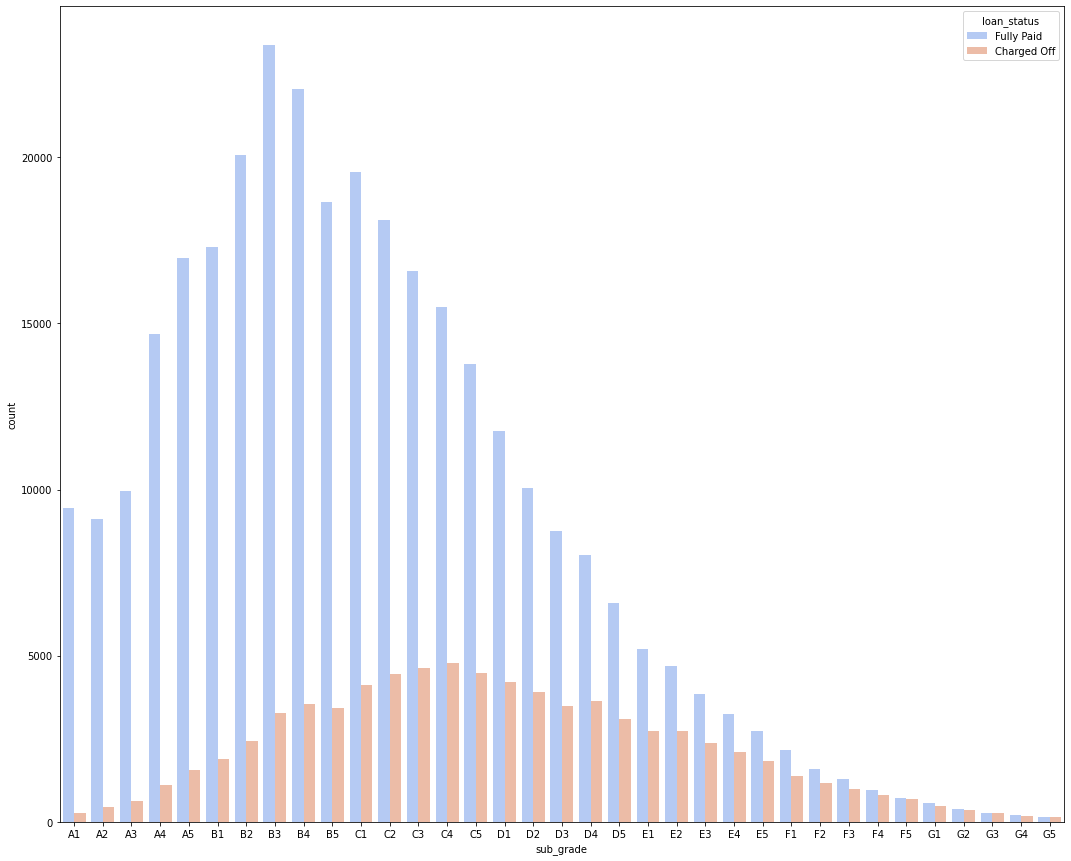

In [18]:
plt.figure(figsize=(18,15))
subgrade_order = sorted(df["sub_grade"].unique())
sns.countplot(x="sub_grade", data=df, hue="loan_status",palette="coolwarm", order=subgrade_order)

In [19]:
sorted(df["sub_grade"].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

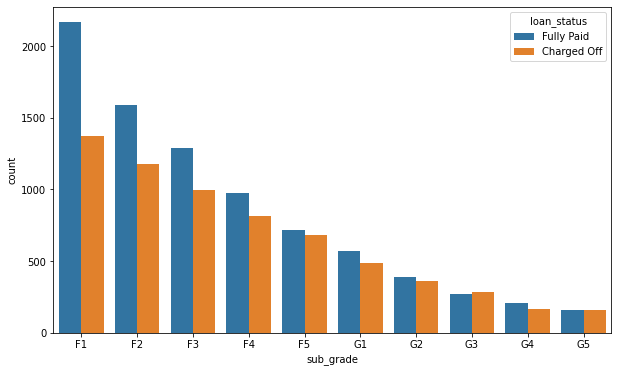

In [20]:
plt.figure(figsize=(10,6))
f_g = df[(df["grade"] == "G") | (df["grade"] == "F")]
subgrade_order = sorted(f_g["sub_grade"].unique())
sns.countplot(x="sub_grade", data=f_g, order=subgrade_order, hue="loan_status")

In [21]:
df["loan_repaid"] = df["loan_status"].map({"Fully Paid":1, "Charged Off": 0})

In [22]:
df[["loan_status","loan_repaid"]]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


<AxesSubplot:>

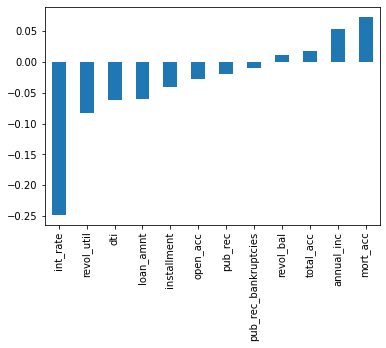

In [23]:
df.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar")


In [24]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36 months,36 months,36 months,36 months,60 months,36 months,36 months,36 months,60 months,36 months,...,36 months,36 months,36 months,36 months,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
grade,B,B,B,A,C,C,A,B,B,C,...,B,A,C,D,B,B,C,B,C,C
sub_grade,B4,B5,B3,A2,C5,C3,A1,B2,B3,C5,...,B3,A1,C1,D4,B4,B4,C1,B1,C2,C2
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.,HR Specialist,Software Development Engineer,Office Depot,Application Architect,Regado Biosciences,...,Retirement Counselor,St Francis Medical Center,Data Center Specialist II,Operations Manager,Michael's Arts & Crafts,licensed bankere,Agent,City Carrier,"Gracon Services, Inc",Internal Revenue Service
emp_length,10+ years,4 years,< 1 year,6 years,9 years,10+ years,2 years,10+ years,10+ years,3 years,...,10+ years,10+ years,1 year,10+ years,5 years,2 years,5 years,10+ years,10+ years,10+ years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0


In [25]:
len(df)

396030

In [26]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [27]:
df.isnull().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [28]:
df["emp_title"].nunique()

173105

In [29]:
df["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [30]:
df.drop("emp_title", axis=1, inplace=True)

In [31]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [32]:
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [33]:
emp_length_order = [
   '< 1 year'
  ,'1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years',
]

In [34]:
emp_length_order

['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

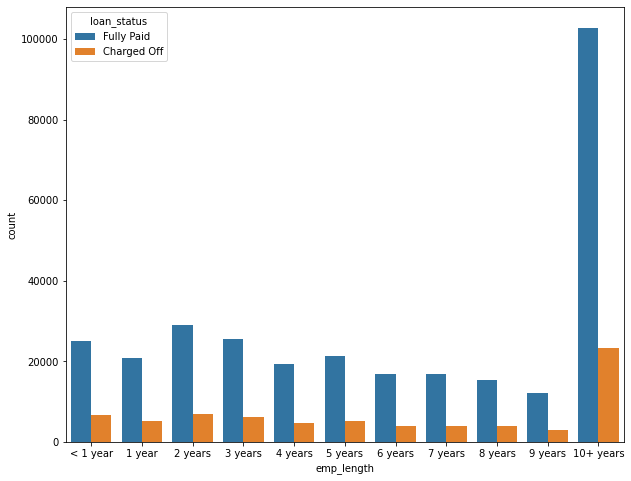

In [35]:

plt.figure(figsize=(10,8))
sns.countplot(x="emp_length", data=df, order=emp_length_order, hue="loan_status")

In [36]:
emp_co = df[df["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]

In [37]:
emp_fp = df[df["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

<AxesSubplot:xlabel='emp_length'>

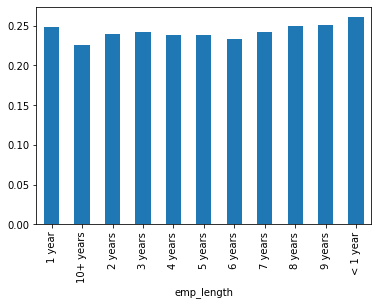

In [38]:
(emp_co / emp_fp).plot(kind="bar")

In [39]:
df.drop("emp_length", axis=1, inplace=True)

In [40]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",1


In [41]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [42]:
df["purpose"]

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [43]:
df["title"]

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [44]:
df.drop("title", axis=1, inplace=True)

In [45]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [46]:
df["mort_acc"].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [47]:
df.corr()["mort_acc"].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [48]:
total_acc_avg = df.groupby("total_acc").mean()["mort_acc"]
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [49]:
def fill_mort_acc(total_acc, mort_acc):
  
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else:
    return mort_acc

In [50]:
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

In [51]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

## Categorical Varibales

In [52]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [53]:
df["term"]

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 396030, dtype: object

In [54]:
df["term"].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

In [55]:
df["term"] = df["term"].apply(lambda term: int(term[:3]))

In [56]:
df["term"]

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 396030, dtype: int64

In [57]:
df.select_dtypes(["object"]).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [58]:
df["grade"]

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [59]:
df.drop("grade", axis=1, inplace=True)

In [60]:
df.select_dtypes(["object"]).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [61]:
dummies = pd.get_dummies(df["sub_grade"], drop_first=True)

df = pd.concat([df.drop("sub_grade", axis=1), dummies], axis=1)

In [62]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,396020,396021,396022,396023,396024,396025,396026,396027,396028,396029
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0,20000.0,18000.0,13000.0,18900.0,26300.0,...,10000.0,3200.0,12000.0,22000.0,6000.0,10000.0,21000.0,5000.0,21000.0,2000.0
term,36,36,36,36,60,36,36,36,60,36,...,36,36,36,36,36,60,36,36,60,36
int_rate,11.44,11.99,10.49,6.49,17.27,13.33,5.32,11.14,10.99,16.29,...,9.76,5.42,12.29,18.92,13.11,10.99,12.29,9.99,15.31,13.61
installment,329.48,265.68,506.97,220.65,609.33,677.07,542.07,426.47,410.84,928.4,...,321.55,96.52,400.24,805.55,202.49,217.38,700.42,161.32,503.02,67.98
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE,MORTGAGE,MORTGAGE,RENT,RENT,MORTGAGE,...,RENT,RENT,RENT,MORTGAGE,RENT,RENT,MORTGAGE,RENT,MORTGAGE,RENT
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0,86788.0,125000.0,46000.0,103000.0,115000.0,...,40000.0,33000.0,52100.0,138000.0,64000.0,40000.0,110000.0,56500.0,64000.0,42996.0
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified,Verified,Source Verified,Not Verified,Verified,Verified,...,Not Verified,Not Verified,Source Verified,Not Verified,Not Verified,Source Verified,Source Verified,Verified,Verified,Verified
issue_d,Jan-2015,Jan-2015,Jan-2015,Nov-2014,Apr-2013,Sep-2015,Sep-2015,Sep-2012,Oct-2014,Apr-2012,...,Dec-2015,Feb-2011,Oct-2015,Apr-2014,Mar-2013,Oct-2015,Feb-2015,Oct-2013,Aug-2012,Jun-2010
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,...,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
purpose,vacation,debt_consolidation,credit_card,credit_card,credit_card,debt_consolidation,home_improvement,credit_card,debt_consolidation,debt_consolidation,...,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation,debt_consolidation


In [63]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [64]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
A2                        0
A3                        0
A4                        0
A5                        0
B1                        0
B2                        0
B3                        0
B4                        0
B5                        0
C1                        0
C2                        0
C3                        0
C4                  

In [65]:
dummies = pd.get_dummies(df["verification_status"], drop_first=True)

df = pd.concat([df.drop("verification_status", axis=1), dummies], axis=1)

In [66]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified'],
      dtype='object')

In [67]:
dummies = pd.get_dummies(df["application_type"], drop_first=True)

df = pd.concat([df.drop("application_type", axis=1), dummies], axis=1)

In [68]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies',
       'address', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3',
       'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
       'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2',
       'G3', 'G4', 'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT'],
      dtype='object')

In [69]:
dummies = pd.get_dummies(df["initial_list_status"], drop_first=True)

df = pd.concat([df.drop("initial_list_status", axis=1), dummies], axis=1)

In [70]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5', 'Source Verified', 'Verified', 'INDIVIDUAL', 'JOINT', 'w'],
      dtype='object')

In [71]:
dummies = pd.get_dummies(df["purpose"], drop_first=True)

df = pd.concat([df.drop("purpose", axis=1), dummies], axis=1)

In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

In [73]:
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
home_ownership      0
                   ..
other               0
renewable_energy    0
small_business      0
vacation            0
wedding             0
Length: 71, dtype: int64

In [74]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [75]:
df["home_ownership"].replace(["ANY", "NONE"], "OTHER", inplace=True)

In [76]:
df["home_ownership"].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: home_ownership, dtype: int64

In [77]:
dummies = pd.get_dummies(df["home_ownership"], drop_first=True)

df = pd.concat([df.drop("home_ownership", axis=1), dummies], axis=1)

In [78]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT'],
      dtype='object')

In [79]:
df["address"]

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 396030, dtype: object

In [80]:
df["address"].value_counts()

USCGC Smith\nFPO AE 70466                           8
USS Johnson\nFPO AE 48052                           8
USNS Johnson\nFPO AE 05113                          8
USS Smith\nFPO AP 70466                             8
USNS Johnson\nFPO AP 48052                          7
                                                   ..
455 Tricia Cove\nAustinbury, FL 00813               1
7776 Flores Fall\nFernandezshire, UT 05113          1
6577 Mia Harbors Apt. 171\nRobertshire, OK 22690    1
8141 Cox Greens Suite 186\nMadisonstad, VT 05113    1
787 Michelle Causeway\nBriannaton, AR 48052         1
Name: address, Length: 393700, dtype: int64

In [81]:
df["zip_code"] = df["address"].apply(lambda address: address[-5:])

In [82]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', 'zip_code'],
      dtype='object')

In [83]:
df["zip_code"].value_counts()

70466    56985
30723    56546
22690    56527
48052    55917
00813    45824
29597    45471
05113    45402
11650    11226
93700    11151
86630    10981
Name: zip_code, dtype: int64

In [84]:
dummies = pd.get_dummies(df["zip_code"], drop_first=True)

df = pd.concat([df.drop("zip_code", axis=1), dummies], axis=1)

In [85]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'issue_d',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified', 'Verified',
       'INDIVIDUAL', 'JOINT', 'w', 'credit_card', 'debt_consolidation',
       'educational', 'home_improvement', 'house', 'major_purchase', 'medical',
       'moving', 'other', 'renewable_energy', 'small_business', 'vacation',
       'wedding', 'OTHER', 'OWN', 'RENT', '05113', '11650', '22690', '29597',
       '30723', '48052', '70466', '86630', '93700'],
      dtype='object')

In [86]:
df.drop("address", axis=1, inplace=True)

In [87]:
df["issue_d"]

0         Jan-2015
1         Jan-2015
2         Jan-2015
3         Nov-2014
4         Apr-2013
            ...   
396025    Oct-2015
396026    Feb-2015
396027    Oct-2013
396028    Aug-2012
396029    Jun-2010
Name: issue_d, Length: 396030, dtype: object

In [88]:
df.drop("issue_d", axis=1, inplace=True)

In [89]:
df["earliest_cr_line"]

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

In [90]:
df["earliest_cr_year"] = pd.DatetimeIndex(df["earliest_cr_line"]).year

In [91]:
df["earliest_cr_year"]

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_year, Length: 396030, dtype: int64

In [92]:
df.drop("earliest_cr_line", axis=1, inplace=True)

In [93]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding', 'OTHER', 'OWN', 'RENT',
       '05113', '11650', '22690', '29597', '30723', '48052', '70466', '86630',
       '93700', 'earliest_cr_year'],
      dtype='object')

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
df["loan_status"]

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

In [96]:
df["loan_repaid"]

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

In [97]:
df.drop("loan_status", axis=1, inplace=True)

In [98]:
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
48052               0
70466               0
86630               0
93700               0
earliest_cr_year    0
Length: 79, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X = df.drop("loan_repaid", axis=1)
y = df["loan_repaid"]

In [101]:
X_train.shape

NameError: ignored

In [ ]:
y_train.shape

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [104]:
X_test.shape

(79206, 78)

In [105]:
y_test.shape

(79206,)

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

# Creating the Model

In [110]:
len(df)

396030

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [112]:
model = Sequential()

In [114]:
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [115]:
df.isnull().sum()

loan_amnt           0
term                0
int_rate            0
installment         0
annual_inc          0
                   ..
48052               0
70466               0
86630               0
93700               0
earliest_cr_year    0
Length: 79, dtype: int64

In [116]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


In [117]:
df[df["revol_util"] != 0.0]

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,0,1,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,...,0,0,0,0,1,0,0,0,0,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,...,1,0,0,0,0,0,0,0,0,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,...,0,0,0,0,0,0,1,0,0,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,53.8,...,0,0,0,1,0,0,0,0,0,1990


In [118]:
df = df.dropna()

In [119]:
X = df.drop("loan_repaid", axis=1)
y = df["loan_repaid"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [121]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
model = Sequential()

model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(38,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

In [123]:
model.fit(X_train, y_train, epochs=30, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/30
1236/1236 [==============================] - 10s 4ms/step - loss: 0.2995 - val_loss: 0.2602
Epoch 2/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2661 - val_loss: 0.2582
Epoch 3/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2639 - val_loss: 0.2581
Epoch 4/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2625 - val_loss: 0.2578
Epoch 5/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2623 - val_loss: 0.2577
Epoch 6/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2615 - val_loss: 0.2573
Epoch 7/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2613 - val_loss: 0.2571
Epoch 8/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2608 - val_loss: 0.2571
Epoch 9/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2604 - val_loss: 0.2569
Epoch 10/30
1236/1236 [==============================] - 4s 3ms/step - loss: 0.26

In [124]:
from tensorflow.keras.models import load_model

In [125]:
model.save("mymodel.h5")

# Evaluating Model

In [126]:
model.history.history

{'loss': [0.2994914650917053,
  0.26614177227020264,
  0.26385271549224854,
  0.26250433921813965,
  0.2622540295124054,
  0.2615017592906952,
  0.2612901031970978,
  0.26084578037261963,
  0.26041170954704285,
  0.26012367010116577,
  0.25988197326660156,
  0.25982314348220825,
  0.25950390100479126,
  0.25951048731803894,
  0.25889381766319275,
  0.2589661478996277,
  0.25872769951820374,
  0.2585565149784088,
  0.25823602080345154,
  0.25836849212646484,
  0.2578534185886383,
  0.2577939033508301,
  0.25770485401153564,
  0.2576359510421753,
  0.2573009729385376,
  0.2572983503341675,
  0.2569792866706848,
  0.25713858008384705,
  0.256879597902298,
  0.25691133737564087],
 'val_loss': [0.2601904571056366,
  0.25815314054489136,
  0.2581489086151123,
  0.257824569940567,
  0.2576739490032196,
  0.2573474049568176,
  0.2570897042751312,
  0.25711771845817566,
  0.25694429874420166,
  0.2565959692001343,
  0.25705280900001526,
  0.2567424476146698,
  0.2575293481349945,
  0.2564921081

In [127]:
losses = pd.DataFrame(model.history.history)

In [128]:
losses

,loss,val_loss
0,0.299491,0.260190
1,0.266142,0.258153
2,0.263853,0.258149
3,0.262504,0.257825
4,0.262254,0.257674
5,0.261502,0.257347
6,0.261290,0.257090
7,0.260846,0.257118
8,0.260412,0.256944
9,0.260124,0.256596


<AxesSubplot:>

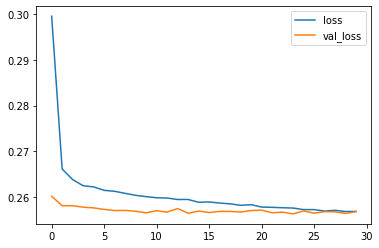

In [129]:
losses.plot()

In [130]:
from sklearn.metrics import classification_report, confusion_matrix

In [131]:
y_preds = (model.predict(X_test) > 0.5) * 1

2471/2471 [==============================] - 4s 1ms/step


In [132]:
print(classification_report(y_test, y_preds))
print("\n")
print(confusion_matrix(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.45      0.61     15463
           1       0.88      1.00      0.94     63581

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 6975  8488]
 [  275 63306]]


In [133]:
import random
random.seed(101)
random_index = random.randint(0,len(df))

new_customer = df.drop("loan_repaid", axis=1).iloc[random_index]

In [134]:
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [135]:
new_customer = scaler.transform(new_customer.values.reshape(1,78))

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [136]:
model.predict(new_customer) > 0.5

1/1 [==============================] - 0s 20ms/step


array([[ True]])